<a href="https://colab.research.google.com/github/tosuun/Data-Analysis/blob/main/arabaFiyatTahmin_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
dataFrame = pd.read_excel("merc.xlsx")
newDF = dataFrame.sort_values("price",ascending=False).iloc[131:]
dataFrame = newDF
dataFrame = dataFrame[dataFrame.year!=1970]
dataFrame = dataFrame.drop("transmission",axis = 1)
y = dataFrame["price"].values
x = dataFrame.drop("price",axis = 1).values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(1))
model.compile(optimizer = "adam",loss = "mse")
model.fit(x=x_train,y=y_train,validation_data =(x_test,y_test),batch_size = 250,epochs = 300)


Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 679961856.0000 - val_loss: 688083264.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 677276608.0000 - val_loss: 687992128.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 680126144.0000 - val_loss: 687690432.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 662642432.0000 - val_loss: 686754304.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 670868352.0000 - val_loss: 684174464.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 659404480.0000 - val_loss: 677940032.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 665622720.0000 - val_loss: 664853696.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 643075968.0000 - val_loss: 640433856.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 623564352.0000 - val_loss: 599367488.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 569661312.0000 - val_loss: 5363

<Axes: >

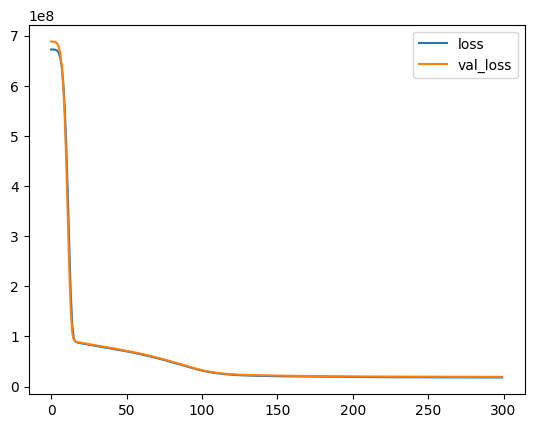

In [ ]:
kayipVerisi = pd.DataFrame(model.history.history)
kayipVerisi.plot()

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


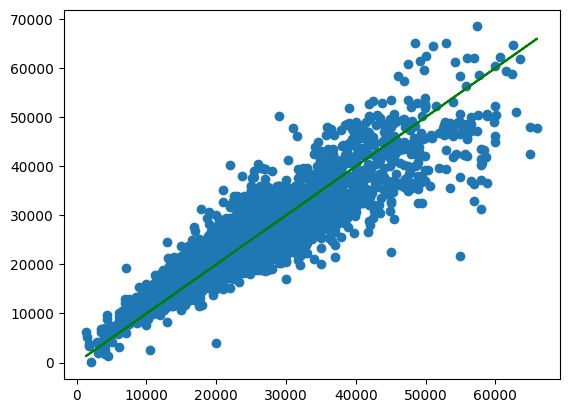

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
tahmin = model.predict(x_test)
mean_absolute_error(y_test,tahmin)
plt.scatter(y_test,tahmin)
plt.plot(y_test,y_test,"g")

In [ ]:
dataFrame.iloc[2]

,3191
year,2020.0
price,65980.0
mileage,3999.0
tax,145.0
mpg,28.0
engineSize,4.0


In [ ]:
yeniArabaSeries=dataFrame.drop("price",axis = 1).iloc[2]
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))
model.predict(yeniArabaSeries)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[63076.42]], dtype=float32)